In [130]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [131]:
train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [132]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [133]:
train.shape

(8693, 14)

In [134]:
test.shape

(4277, 13)

In [135]:
test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [136]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [137]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [138]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [139]:
train['HomePlanet'].unique()

array(['Europa', 'Earth', 'Mars', nan], dtype=object)

In [140]:
train['Destination'].unique()

array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', nan], dtype=object)

In [141]:
numerical_cols_train = train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_train = train.select_dtypes(exclude=['int64', 'float64']).drop(columns=['Transported']).columns

In [142]:
train['CryoSleep'] = train['CryoSleep'].astype(str).replace('False', 0)
train['CryoSleep'] = train['CryoSleep'].astype(str).replace('True', 1)

train['VIP'] = train['VIP'].astype(str).replace('False', 0)
train['VIP'] = train['VIP'].astype(str).replace('True', 1)


In [143]:
numerical_cols_train

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [144]:
categorical_cols_train

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP',
       'Name'],
      dtype='object')

In [145]:
for col in categorical_cols_train:
    train[col] = train[col].replace('nan', None)

In [146]:
for col in numerical_cols_train:
    train[col] = train[col].fillna(train[col].median())

for col in categorical_cols_train:
    train[col] = train[col].fillna(train[col].mode()[0])

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

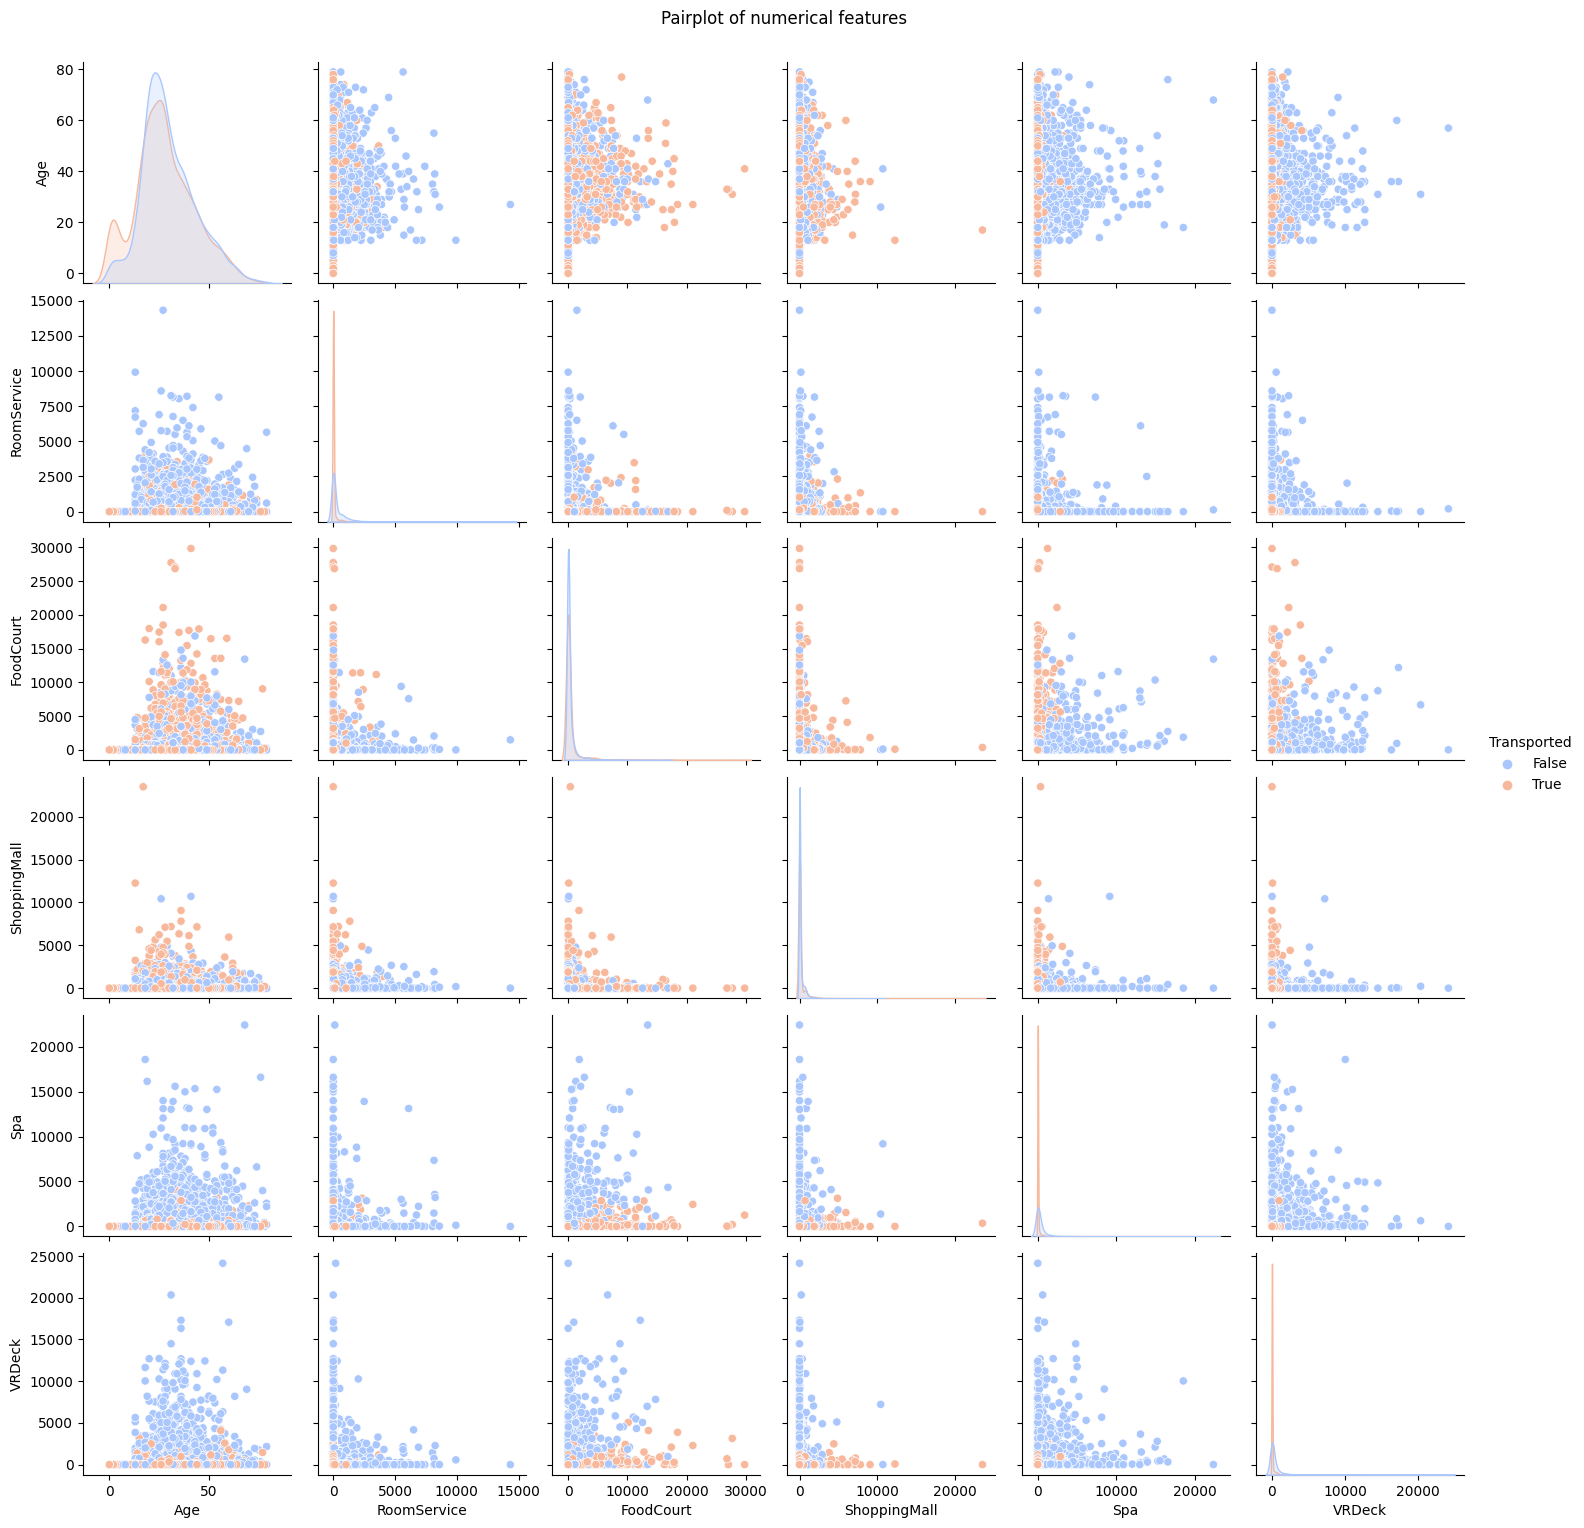

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train, vars=['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], hue='Transported', palette='coolwarm')
plt.suptitle('Pairplot of numerical features', y=1.02)
plt.show()

In [148]:
train['Transported'] = train['Transported'].replace(False, 0)
train['Transported'] = train['Transported'].replace(True, 1)

<ipython-input-148-f1c33d3b8874>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Transported'] = train['Transported'].replace(True, 1)


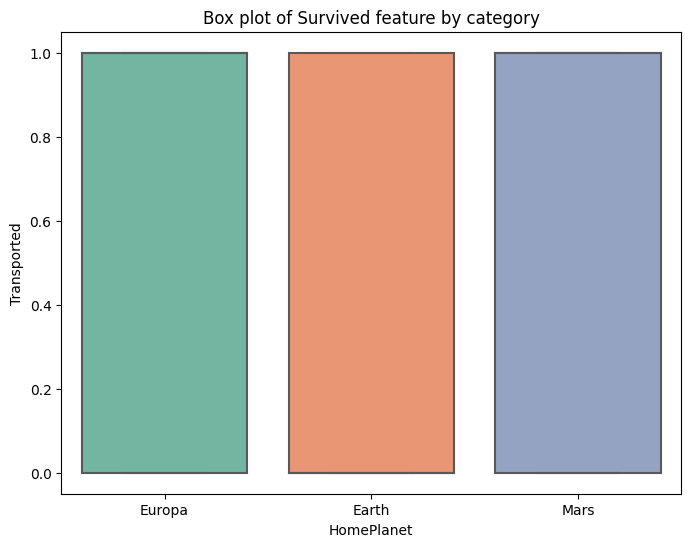

In [149]:

# ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']

plt.figure(figsize=(8, 6))
sns.boxplot(x='HomePlanet', y='Transported', data=train, palette='Set2')
plt.title('Box plot of Survived feature by category')
plt.xlabel('HomePlanet')
plt.ylabel('Transported')
plt.show()

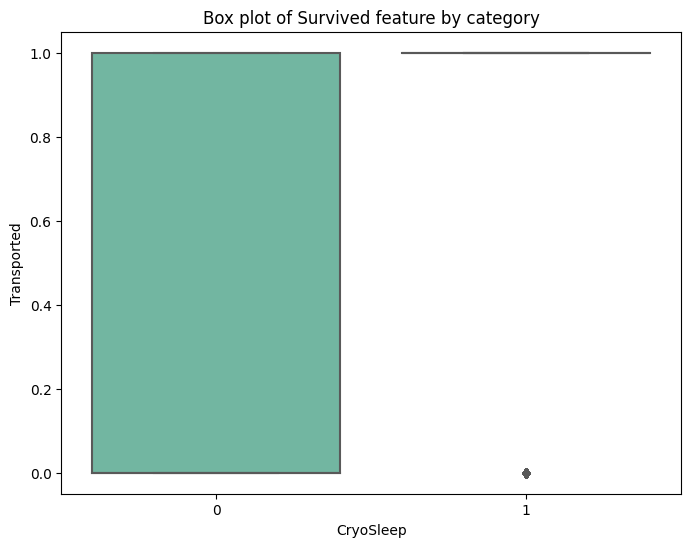

In [150]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='CryoSleep', y='Transported', data=train, palette='Set2')
plt.title('Box plot of Survived feature by category')
plt.xlabel('CryoSleep')
plt.ylabel('Transported')
plt.show()

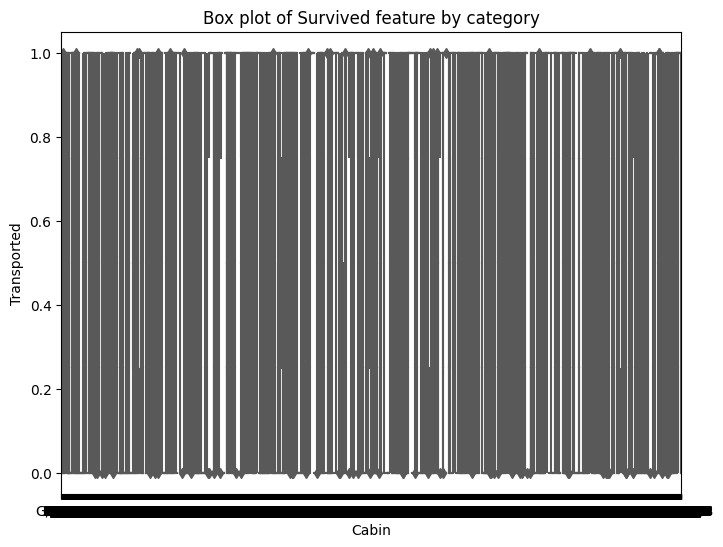

In [151]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cabin', y='Transported', data=train, palette='Set2')
plt.title('Box plot of Survived feature by category')
plt.xlabel('Cabin')
plt.ylabel('Transported')
plt.show()

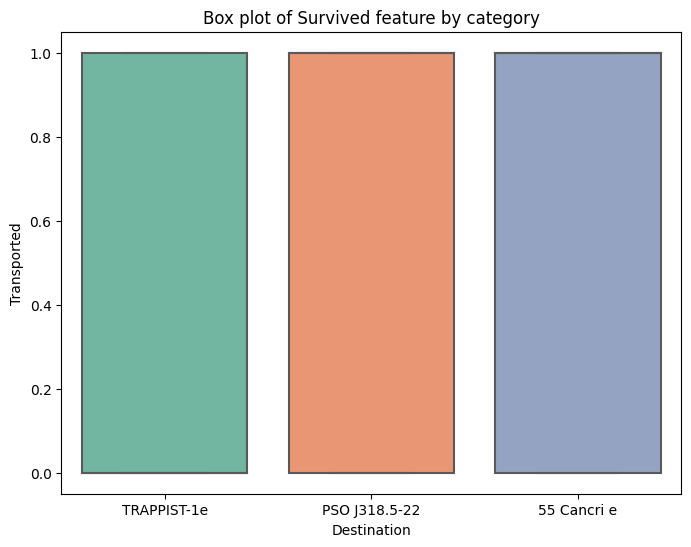

In [152]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Destination', y='Transported', data=train, palette='Set2')
plt.title('Box plot of Survived feature by category')
plt.xlabel('Destination')
plt.ylabel('Transported')
plt.show()

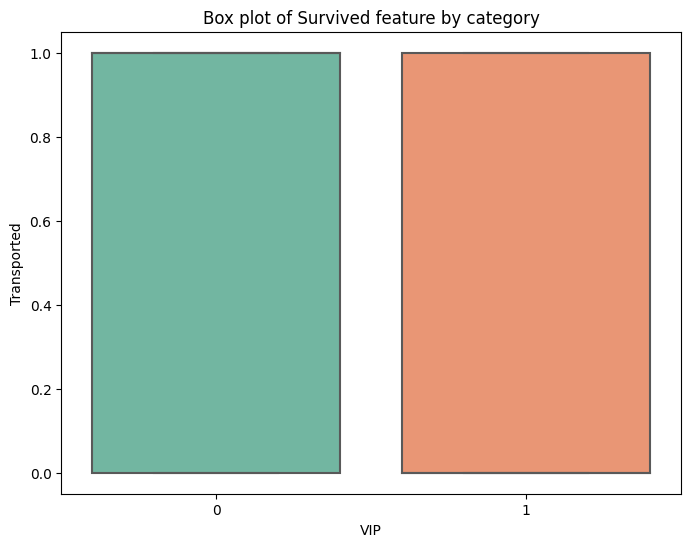

In [153]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='VIP', y='Transported', data=train, palette='Set2')
plt.title('Box plot of Survived feature by category')
plt.xlabel('VIP')
plt.ylabel('Transported')
plt.show()

In [154]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.790291,220.009318,448.434027,169.572300,304.588865,298.261820,0.503624
std,14.341404,660.519050,1595.790627,598.007164,1125.562559,1134.126417,0.500016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,37.000000,41.000000,61.000000,22.000000,53.000000,40.000000,1.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,1.000000


In [155]:
categorical_cols_train = categorical_cols_train.drop('VIP')
categorical_cols_train = categorical_cols_train.drop('Destination')
categorical_cols_train = categorical_cols_train.drop('HomePlanet')
categorical_cols_train

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Name'], dtype='object')

In [160]:
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder

scaler = RobustScaler()
train_numeric = train[numerical_cols_train]
train[numerical_cols_train] = scaler.fit_transform(train_numeric)


# def one_hot_encode_and_add(df, column):
#     one_hot_encoder = OneHotEncoder(sparse_output=False)
#     one_hot_encoded = one_hot_encoder.fit_transform(df[[column]])
#     encoded_columns = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out([column]))
#     encoded_columns.index = df.index
#     df = pd.concat([df, encoded_columns], axis=1)
#     df = df.drop(columns=[column])
#     return df
    

# categorical_cols_train_copy = categorical_cols_train.copy()

# for col in categorical_cols_train_copy:
#     train = one_hot_encode_and_add(train, col)


train_categoric = train[categorical_cols_train]
train[categorical_cols_train] = scaler.fit_transform(train_categoric)
train[categorical_cols_train]

,CryoSleep
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
8688,0.0
8689,1.0
8690,0.0
8691,0.0


In [161]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier



cols_to_drop = ['Transported', 'Name', 'PassengerId', 'VIP', 'Destination', 'Cabin', 'HomePlanet']

X = train.drop(columns=cols_to_drop, axis=1)
y = train['Transported']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# params = {
#     'n_estimators': 1000,
#     'max_depth': 9,
#     'learning_rate': 0.02,
#     'subsample': 0.9,
#     'colsample_bytree': 0.9,
#     'min_child_weight': 1,
#     'gamma': 0.04,
#     'alpha': 0.04,
#     'lambda': 0.7,
#     'objective': 'binary:logistic',  # For binary classification
#     'eval_metric': 'logloss',
#     'random_state': 42,
#     'n_jobs': -1,
#     'tree_method': 'hist',
#     'early_stopping_rounds': 20,
#     'grow_policy': 'lossguide'
# }

# final_model = xgb.XGBClassifier(**params)
# final_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)

# Make predictions on validation set
y_pred = final_model.predict(X_val)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_val, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       863
           1       0.78      0.81      0.79       876

    accuracy                           0.79      1739
   macro avg       0.79      0.79      0.79      1739
weighted avg       0.79      0.79      0.79      1739



**# Test Data**

In [163]:
numerical_cols_test = test.select_dtypes(include=['int64', 'float64']).columns
categorical_cols_test = test.select_dtypes(exclude=['int64', 'float64']).columns

In [164]:
test['CryoSleep'] = test['CryoSleep'].astype(str).replace('False', 0)
test['CryoSleep'] = test['CryoSleep'].astype(str).replace('True', 1)

test['VIP'] = test['VIP'].astype(str).replace('False', 0)
test['VIP'] = test['VIP'].astype(str).replace('True', 1)

In [167]:
for col in categorical_cols_test:
    test[col] = test[col].replace('nan', None)

In [168]:
for col in numerical_cols_test:
    test[col] = test[col].fillna(test[col].median())

for col in categorical_cols_test:
    test[col] = test[col].fillna(test[col].mode()[0])

In [169]:
categorical_cols_test = categorical_cols_test.drop('VIP')
categorical_cols_test = categorical_cols_test.drop('Destination')
categorical_cols_test = categorical_cols_test.drop('HomePlanet')
categorical_cols_test

Index(['PassengerId', 'CryoSleep', 'Cabin', 'Name'], dtype='object')

In [172]:
categorical_cols_test = categorical_cols_test.drop('Cabin')

In [ ]:
categorical_cols_test = categorical_cols_test.drop('Name')

In [176]:
from sklearn.preprocessing import RobustScaler, LabelEncoder, OneHotEncoder

scaler = RobustScaler()
test_numeric = test[numerical_cols_test]
test[numerical_cols_test] = scaler.fit_transform(test_numeric)


# def one_hot_encode_and_add(df, column):
#     one_hot_encoder = OneHotEncoder(sparse_output=False)
#     one_hot_encoded = one_hot_encoder.fit_transform(df[[column]])
#     encoded_columns = pd.DataFrame(one_hot_encoded, columns=one_hot_encoder.get_feature_names_out([column]))
#     encoded_columns.index = df.index
#     df = pd.concat([df, encoded_columns], axis=1)
#     df = df.drop(columns=[column])
#     return df
    

# categorical_cols_train_copy = categorical_cols_train.copy()

# for col in categorical_cols_train_copy:
#     train = one_hot_encode_and_add(train, col)


test_categoric = test[categorical_cols_test]
test[categorical_cols_test] = scaler.fit_transform(test_categoric)
test[categorical_cols_test]

,PassengerId,CryoSleep
0,-0.967582,1.0
1,-0.966536,0.0
2,-0.966327,1.0
3,-0.965909,0.0
4,-0.965490,0.0
...,...,...
4272,0.967789,1.0
4273,0.968415,0.0
4274,0.968833,1.0
4275,0.969251,0.0


In [177]:
cols_to_drop = ['Name', 'PassengerId', 'VIP', 'Destination', 'Cabin', 'HomePlanet']

X_test = test.drop(columns=cols_to_drop, axis=1)
y_test_res = final_model.predict(X_test)

preds = [bool(yt) for yt in y_test_res]
print(preds)

output = pd.DataFrame({
    'PassengerId': test.PassengerId,
    'Survived': preds
})
output.to_csv('submission_1.csv', index=False)

[True, False, True, True, False, True, True, True, True, True, False, False, True, True, False, False, False, True, True, False, False, False, True, True, False, False, True, True, False, True, True, False, True, False, False, False, True, True, True, False, True, False, True, True, False, True, False, False, True, False, False, True, False, True, False, True, False, True, True, False, True, False, False, True, True, False, True, False, True, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, True, True, True, False, True, True, False, False, False, False, False, False, True, False, True, True, True, True, True, False, True, False, True, True, False, True, True, False, False, True, False, True, True, False, False, False, False, False, False, False, True, True, False, False, True, False, True, False, True, True, False, True, True, False, False, False, True, False, True, False, True, False, True, True, False, True, True, True, True, False, Fa